In [1]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

In [2]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import matplotlib

matplotlib.rcParams.update({'font.size': 14,
                            'text.usetex': True,      # use TeX backend
                            'mathtext.fontset': 'cm', # computer modern
                            'mathtext.rm': 'serif'})

In [5]:
circuit = Circuit('Resistive Divider')

In [6]:
circuit.V(1, 'n_in', circuit.gnd, 10e-6)
circuit.R(1, 'n_in', 'n_out', 2e3)
circuit.R(2, 'n_out', circuit.gnd, 6e3)
circuit.R(3, 'n_out', circuit.gnd, 6e3) # you can also pass the actual value directly

Resistor R3

In [7]:
print(circuit)

.title Resistive Divider
V1 n_in 0 1e-05
R1 n_in n_out 2000.0
R2 n_out 0 6000.0
R3 n_out 0 6000.0



In [8]:
from lcapy import Circuit

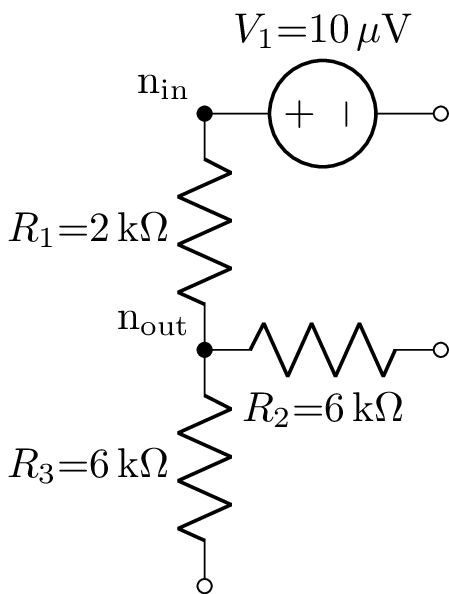

In [9]:
cct = Circuit("""
.title Resistive Divider
V1 n_in 0_1 1e-05; right
R1 n_in n_out 2000.0; down
R2 n_out 0_2 6000.0
R3 n_out 0_3 6000.0; down
""")
cct.draw()

.title Crossbar
Vinput0 input0 0 1
Vinput1 input1 0 2
Vinput2 input2 0 3
RR00 input0 output1 1
RR01 input1 output1 2
RR02 input2 output1 3
RR10 input0 output2 4
RR11 input1 output2 5
RR12 input2 output2 6



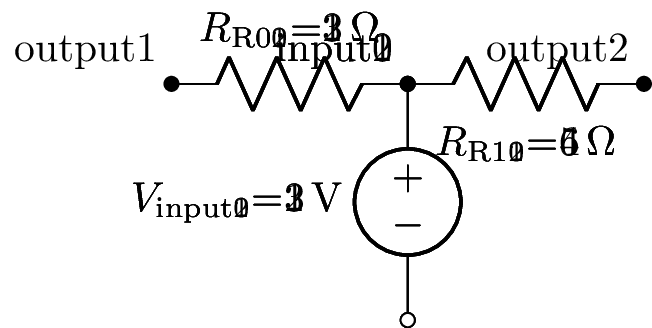

In [16]:
from PySpice.Spice.Netlist import Circuit
from lcapy import Circuit as lcapyCircuit

def getCrossbar(weight_matrix, input_voltage_vector):

    circuit = Circuit('Crossbar')

    # Add the input voltage sources
    for i in range(len(input_voltage_vector)):
        circuit.V('input{}'.format(i), 'input{}'.format(i), circuit.gnd, input_voltage_vector[i])
    
    # column wise
    for i in range(len(weight_matrix)):
        for j in range(len(weight_matrix[i])):
            circuit.R('R{}{}'.format(i, j), 'input{}'.format(j), 'output{}'.format(i+1), weight_matrix[i][j])

    print(circuit)

    cct = lcapyCircuit("""
.title Crossbar
Vinput0 input0 0_1 1; down
Vinput1 input1 0_2 2; down
Vinput2 input2 0_3 3; down
RR00 input0 output1 1; left
RR01 input1 output1 2; left
RR02 input2 output1 3; left
RR10 input0 output2 4; 
RR11 input1 output2 5
RR12 input2 output2 6
; autoground=true, draw_nodes=connections""")
    cct.draw()



getCrossbar([[1, 2, 3], [4, 5, 6]], [1, 2, 3])